In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
plt.style.use('ggplot')
sns.set_style("whitegrid")

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [55]:
df = pd.read_csv("BigBasket Products.csv")

In [4]:
df.head()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


In [5]:
df.shape

(27555, 10)

In [6]:
df.isna().sum()

index              0
product            1
category           0
sub_category       0
brand              1
sale_price         0
market_price       0
type               0
rating          8626
description      115
dtype: int64

In [56]:
df.dropna(subset=['product', 'brand', 'description'], inplace=True)

In [8]:
df.isna().sum()

index              0
product            0
category           0
sub_category       0
brand              0
sale_price         0
market_price       0
type               0
rating          8599
description        0
dtype: int64

In [9]:
df.nunique()

index           27439
product         23449
category           11
sub_category       90
brand            2309
sale_price       3252
market_price     1347
type              426
rating             40
description     21943
dtype: int64

In [10]:
df["category"].unique()

array(['Beauty & Hygiene', 'Kitchen, Garden & Pets',
       'Cleaning & Household', 'Gourmet & World Food',
       'Foodgrains, Oil & Masala', 'Snacks & Branded Foods', 'Beverages',
       'Bakery, Cakes & Dairy', 'Baby Care', 'Fruits & Vegetables',
       'Eggs, Meat & Fish'], dtype=object)

In [11]:
df["discount"] = (df["market_price"] - df["sale_price"]) / df["market_price"] * 100

In [14]:
logSale = np.log(df.sale_price)
df.sale_price = logSale

In [16]:
df_encoded = pd.get_dummies(df, columns=['category', 'type', 'sub_category'])

In [17]:
df_encoded['brand_frequency'] = df_encoded['brand'].map(df_encoded['brand'].value_counts(normalize=True))

In [18]:
df_encoded.head()

,index,product,brand,sale_price,market_price,rating,description,discount,category_Baby Care,"category_Bakery, Cakes & Dairy",category_Beauty & Hygiene,category_Beverages,category_Cleaning & Household,"category_Eggs, Meat & Fish","category_Foodgrains, Oil & Masala",category_Fruits & Vegetables,category_Gourmet & World Food,"category_Kitchen, Garden & Pets",category_Snacks & Branded Foods,type_Adult Diapers,"type_Aerated, Still, Sparkling","type_Agarbatti, Incense Sticks",type_Air Freshener,type_Almonds,"type_Aluminium Foil, Clingwrap",type_Antiseptics & Bandages,type_Apples & Pomegranate,type_Aromatherapy,type_Atta Whole Wheat,type_Attar,type_Ayurveda,type_Baby Bath,type_Baby Buds,type_Baby Creams & Lotions,type_Baby Dishes & Utensils,type_Baby Food,type_Baby Gift Sets,type_Baby Health,type_Baby Laundry,type_Baby Oil & Shampoo,type_Baby Oral Care,type_Baby Powder,type_Baby Toys,type_Baby Wipes,type_Bagels & Baguette,"type_Bakery Biscuits, Cookies",type_Bakeware Accessories,"type_Bakeware Moulds, Cutters",type_Baking Accessories,type_Baking Tools & Brushes,"type_Baking, Cake Decorations",type_Balsamic & Cider Vinegar,"type_Banana, Sapota & Papaya",type_Basmati Rice,type_Bath & Shower,type_Bath Salts & Oils,"type_Bath Stool, Basin & Sets",type_Bathing Accessories,type_Bathing Bars & Soaps,type_Battery & Electrical,type_Beans & Pulses,"type_Beans, Brinjals & Okra",type_Bibs & Napkins,type_Birthday & Party Cakes,type_Blended Cooking Oils,type_Blended Masalas,type_Body Care,type_Body Scrubs & Exfoliants,type_Body Sprays & Mists,type_Boiled & Steam Rice,type_Books & Magazines,type_Bowls & Vessels,type_Bread Sticks & Lavash,type_Breakfast & Snack Mixes,type_Brooms & Dust Pans,"type_Brown, Wheat & Multigrain",type_Buckets & Mugs,"type_Buns, Pavs & Pizza Base",type_Butter & Cream,type_Butter & Margarine,type_Buttermilk & Lassi,type_CFL & Led Bulbs,type_Cabbage & Cauliflower,type_Camphor & Wicks,type_Candles & Match Box,type_Canned Food,type_Canned Seafood,type_Canola & Rapeseed Oil,"type_Caps, Balloons & Candles",type_Car Freshener,type_Car Polish & Cleaners,type_Cashews,type_Casserole,type_Cereal & Granola Bars,type_Cereals & Millets,type_Cheese,type_Cheese & Garlic Bread,type_Chicken Sausages,type_Chikki & Gajjak,type_Children (2-5 Yrs),type_Chilli & Soya Sauce,type_Chips & Corn Snacks,type_Choco & Nut Spread,"type_Chocolate, Peanut Spread",type_Chocolates,type_Choppers & Graters,type_Chutney Powder,type_Cloth Dryer & Iron Table,type_Cocktail Mixes,type_Coffee & Pre-Mix,type_Cold Drinks,type_Colours & Crayons,type_Combos & Gift Sets,"type_Combs, Brushes, Clippers","type_Condensed, Powdered Milk",type_Containers Sets,type_Cook And Serve,type_Cookies,"type_Cookies, Biscotti, Wafer","type_Cooking Chocolate, Cocoa",type_Cooking Pastes,type_Cookware Sets,type_Copper Utensils,type_Cotton & Ear Buds,type_Country Eggs,type_Crackers & Digestive,type_Cream & Cheese Spreads,type_Cream Biscuits & Wafers,"type_Croissants, Bagels",type_Cucumber & Capsicum,type_Cup Noodles,"type_Cups, Mugs & Tumblers",type_Curd,"type_Curry Paste, Coconut Milk",type_Cut & Peeled Veggies,"type_Cut Fruit, Tender Coconut","type_Cutlery, Spoon & Fork",type_Dairy Free (Vegan),type_Decorations,type_Dessert Mixes,type_Detergent Bars,"type_Detergent Powder, Liquid",type_Diabetic Drinks,type_Diapers,type_Dinner Sets,type_Dips & Dressings,type_Dishwash Bars & Powders,type_Dishwash Liquids & Pastes,type_Disinfectant Spray & Cleaners,type_Disposable Cups & Plates,type_Dry Fish,type_Dry Fruits & Berries,type_Dry Shampoo & Conditioner,type_Dust Cloth & Wipes,type_Dustbins,type_Eau De Cologne,type_Eau De Parfum,type_Eau De Toilette,type_Electric Toothbrush,type_Electronic Accessories,type_Erasers & Sharpeners,type_Everyday Medicine,type_Exam Pads & Pencil Box,type_Exotic & Flavoured Tea,type_Exotic Fruits,type_Exotic Sugar & Salt,type_Exotic Vegetables,type_Extra Virgin Olive Oil,type_Eye Care,type_Eyes,"type_Fabric Pre, Post Wash",type_Face,type_Face & Body,type_Face Care,type_Fac

In [19]:
df_encoded.shape

(27439, 536)

In [20]:
columns_to_drop = ['product', 'description', 'brand']
df_encoded = df_encoded.drop(columns=columns_to_drop)

In [21]:
columns_to_exclude = ['rating']

# List of columns to convert to integers
columns_to_convert = [col for col in df_encoded.columns if col not in columns_to_exclude]

# Convert selected columns to integers
df_encoded[columns_to_convert] = df_encoded[columns_to_convert].astype(int)

In [18]:
df_encoded.head()

,index,sub_category,sale_price,market_price,rating,category_Baby Care,"category_Bakery, Cakes & Dairy",category_Beauty & Hygiene,category_Beverages,category_Cleaning & Household,"category_Eggs, Meat & Fish","category_Foodgrains, Oil & Masala",category_Fruits & Vegetables,category_Gourmet & World Food,"category_Kitchen, Garden & Pets",category_Snacks & Branded Foods,type_Adult Diapers,"type_Aerated, Still, Sparkling","type_Agarbatti, Incense Sticks",type_Air Freshener,type_Almonds,"type_Aluminium Foil, Clingwrap",type_Antiseptics & Bandages,type_Apples & Pomegranate,type_Aromatherapy,type_Atta Whole Wheat,type_Attar,type_Ayurveda,type_Baby Bath,type_Baby Buds,type_Baby Creams & Lotions,type_Baby Dishes & Utensils,type_Baby Food,type_Baby Gift Sets,type_Baby Health,type_Baby Laundry,type_Baby Oil & Shampoo,type_Baby Oral Care,type_Baby Powder,type_Baby Toys,type_Baby Wipes,type_Bagels & Baguette,"type_Bakery Biscuits, Cookies",type_Bakeware Accessories,"type_Bakeware Moulds, Cutters",type_Baking Accessories,type_Baking Tools & Brushes,"type_Baking, Cake Decorations",type_Balsamic & Cider Vinegar,"type_Banana, Sapota & Papaya",type_Basmati Rice,type_Bath & Shower,type_Bath Salts & Oils,"type_Bath Stool, Basin & Sets",type_Bathing Accessories,type_Bathing Bars & Soaps,type_Battery & Electrical,type_Beans & Pulses,"type_Beans, Brinjals & Okra",type_Bibs & Napkins,type_Birthday & Party Cakes,type_Blended Cooking Oils,type_Blended Masalas,type_Body Care,type_Body Scrubs & Exfoliants,type_Body Sprays & Mists,type_Boiled & Steam Rice,type_Books & Magazines,type_Bowls & Vessels,type_Bread Sticks & Lavash,type_Breakfast & Snack Mixes,type_Brooms & Dust Pans,"type_Brown, Wheat & Multigrain",type_Buckets & Mugs,"type_Buns, Pavs & Pizza Base",type_Butter & Cream,type_Butter & Margarine,type_Buttermilk & Lassi,type_CFL & Led Bulbs,type_Cabbage & Cauliflower,type_Camphor & Wicks,type_Candles & Match Box,type_Canned Food,type_Canned Seafood,type_Canola & Rapeseed Oil,"type_Caps, Balloons & Candles",type_Car Freshener,type_Car Polish & Cleaners,type_Cashews,type_Casserole,type_Cereal & Granola Bars,type_Cereals & Millets,type_Cheese,type_Cheese & Garlic Bread,type_Chicken Sausages,type_Chikki & Gajjak,type_Children (2-5 Yrs),type_Chilli & Soya Sauce,type_Chips & Corn Snacks,type_Choco & Nut Spread,"type_Chocolate, Peanut Spread",type_Chocolates,type_Choppers & Graters,type_Chutney Powder,type_Cloth Dryer & Iron Table,type_Cocktail Mixes,type_Coffee & Pre-Mix,type_Cold Drinks,type_Colours & Crayons,type_Combos & Gift Sets,"type_Combs, Brushes, Clippers","type_Condensed, Powdered Milk",type_Containers Sets,type_Cook And Serve,type_Cookies,"type_Cookies, Biscotti, Wafer","type_Cooking Chocolate, Cocoa",type_Cooking Pastes,type_Cookware Sets,type_Copper Utensils,type_Cotton & Ear Buds,type_Country Eggs,type_Crackers & Digestive,type_Cream & Cheese Spreads,type_Cream Biscuits & Wafers,"type_Croissants, Bagels",type_Cucumber & Capsicum,type_Cup Noodles,"type_Cups, Mugs & Tumblers",type_Curd,"type_Curry Paste, Coconut Milk",type_Cut & Peeled Veggies,"type_Cut Fruit, Tender Coconut","type_Cutlery, Spoon & Fork",type_Dairy Free (Vegan),type_Decorations,type_Dessert Mixes,type_Detergent Bars,"type_Detergent Powder, Liquid",type_Diabetic Drinks,type_Diapers,type_Dinner Sets,type_Dips & Dressings,type_Dishwash Bars & Powders,type_Dishwash Liquids & Pastes,type_Disinfectant Spray & Cleaners,type_Disposable Cups & Plates,type_Dry Fish,type_Dry Fruits & Berries,type_Dry Shampoo & Conditioner,type_Dust Cloth & Wipes,type_Dustbins,type_Eau De Cologne,type_Eau De Parfum,type_Eau De Toilette,type_Electric Toothbrush,type_Electronic Accessories,type_Erasers & Sharpeners,type_Everyday Medicine,type_Exam Pads & Pencil Box,type_Exotic & Flavoured Tea,type_Exotic Fruits,type_Exotic Sugar & Salt,type_Exotic Vegetables,type_Extra Virgin Olive Oil,type_Eye Care,type_Eyes,"type_Fabric Pre, Post Wash",type_Face,type_Face & Body,type_Face Care,type_Face Masks & Safety Gears

In [22]:
df_encoded.shape

(27439, 533)

In [23]:
test_df = df_encoded[df_encoded['rating'].isna()]
train_df = df_encoded[~df_encoded['rating'].isna()]

In [24]:
test_df.head(3)

,index,sale_price,market_price,rating,discount,category_Baby Care,"category_Bakery, Cakes & Dairy",category_Beauty & Hygiene,category_Beverages,category_Cleaning & Household,"category_Eggs, Meat & Fish","category_Foodgrains, Oil & Masala",category_Fruits & Vegetables,category_Gourmet & World Food,"category_Kitchen, Garden & Pets",category_Snacks & Branded Foods,type_Adult Diapers,"type_Aerated, Still, Sparkling","type_Agarbatti, Incense Sticks",type_Air Freshener,type_Almonds,"type_Aluminium Foil, Clingwrap",type_Antiseptics & Bandages,type_Apples & Pomegranate,type_Aromatherapy,type_Atta Whole Wheat,type_Attar,type_Ayurveda,type_Baby Bath,type_Baby Buds,type_Baby Creams & Lotions,type_Baby Dishes & Utensils,type_Baby Food,type_Baby Gift Sets,type_Baby Health,type_Baby Laundry,type_Baby Oil & Shampoo,type_Baby Oral Care,type_Baby Powder,type_Baby Toys,type_Baby Wipes,type_Bagels & Baguette,"type_Bakery Biscuits, Cookies",type_Bakeware Accessories,"type_Bakeware Moulds, Cutters",type_Baking Accessories,type_Baking Tools & Brushes,"type_Baking, Cake Decorations",type_Balsamic & Cider Vinegar,"type_Banana, Sapota & Papaya",type_Basmati Rice,type_Bath & Shower,type_Bath Salts & Oils,"type_Bath Stool, Basin & Sets",type_Bathing Accessories,type_Bathing Bars & Soaps,type_Battery & Electrical,type_Beans & Pulses,"type_Beans, Brinjals & Okra",type_Bibs & Napkins,type_Birthday & Party Cakes,type_Blended Cooking Oils,type_Blended Masalas,type_Body Care,type_Body Scrubs & Exfoliants,type_Body Sprays & Mists,type_Boiled & Steam Rice,type_Books & Magazines,type_Bowls & Vessels,type_Bread Sticks & Lavash,type_Breakfast & Snack Mixes,type_Brooms & Dust Pans,"type_Brown, Wheat & Multigrain",type_Buckets & Mugs,"type_Buns, Pavs & Pizza Base",type_Butter & Cream,type_Butter & Margarine,type_Buttermilk & Lassi,type_CFL & Led Bulbs,type_Cabbage & Cauliflower,type_Camphor & Wicks,type_Candles & Match Box,type_Canned Food,type_Canned Seafood,type_Canola & Rapeseed Oil,"type_Caps, Balloons & Candles",type_Car Freshener,type_Car Polish & Cleaners,type_Cashews,type_Casserole,type_Cereal & Granola Bars,type_Cereals & Millets,type_Cheese,type_Cheese & Garlic Bread,type_Chicken Sausages,type_Chikki & Gajjak,type_Children (2-5 Yrs),type_Chilli & Soya Sauce,type_Chips & Corn Snacks,type_Choco & Nut Spread,"type_Chocolate, Peanut Spread",type_Chocolates,type_Choppers & Graters,type_Chutney Powder,type_Cloth Dryer & Iron Table,type_Cocktail Mixes,type_Coffee & Pre-Mix,type_Cold Drinks,type_Colours & Crayons,type_Combos & Gift Sets,"type_Combs, Brushes, Clippers","type_Condensed, Powdered Milk",type_Containers Sets,type_Cook And Serve,type_Cookies,"type_Cookies, Biscotti, Wafer","type_Cooking Chocolate, Cocoa",type_Cooking Pastes,type_Cookware Sets,type_Copper Utensils,type_Cotton & Ear Buds,type_Country Eggs,type_Crackers & Digestive,type_Cream & Cheese Spreads,type_Cream Biscuits & Wafers,"type_Croissants, Bagels",type_Cucumber & Capsicum,type_Cup Noodles,"type_Cups, Mugs & Tumblers",type_Curd,"type_Curry Paste, Coconut Milk",type_Cut & Peeled Veggies,"type_Cut Fruit, Tender Coconut","type_Cutlery, Spoon & Fork",type_Dairy Free (Vegan),type_Decorations,type_Dessert Mixes,type_Detergent Bars,"type_Detergent Powder, Liquid",type_Diabetic Drinks,type_Diapers,type_Dinner Sets,type_Dips & Dressings,type_Dishwash Bars & Powders,type_Dishwash Liquids & Pastes,type_Disinfectant Spray & Cleaners,type_Disposable Cups & Plates,type_Dry Fish,type_Dry Fruits & Berries,type_Dry Shampoo & Conditioner,type_Dust Cloth & Wipes,type_Dustbins,type_Eau De Cologne,type_Eau De Parfum,type_Eau De Toilette,type_Electric Toothbrush,type_Electronic Accessories,type_Erasers & Sharpeners,type_Everyday Medicine,type_Exam Pads & Pencil Box,type_Exotic & Flavoured Tea,type_Exotic Fruits,type_Exotic Sugar & Salt,type_Exotic Vegetables,type_Extra Virgin Olive Oil,type_Eye Care,type_Eyes,"type_Fabric Pre, Post Wash",type_Face,type_Face & Body,type_Face Care,type_Face Masks & Safety Gears,typ

In [25]:
train_df = train_df.drop(columns=["index"])

In [26]:
train_df.head(3)

,sale_price,market_price,rating,discount,category_Baby Care,"category_Bakery, Cakes & Dairy",category_Beauty & Hygiene,category_Beverages,category_Cleaning & Household,"category_Eggs, Meat & Fish","category_Foodgrains, Oil & Masala",category_Fruits & Vegetables,category_Gourmet & World Food,"category_Kitchen, Garden & Pets",category_Snacks & Branded Foods,type_Adult Diapers,"type_Aerated, Still, Sparkling","type_Agarbatti, Incense Sticks",type_Air Freshener,type_Almonds,"type_Aluminium Foil, Clingwrap",type_Antiseptics & Bandages,type_Apples & Pomegranate,type_Aromatherapy,type_Atta Whole Wheat,type_Attar,type_Ayurveda,type_Baby Bath,type_Baby Buds,type_Baby Creams & Lotions,type_Baby Dishes & Utensils,type_Baby Food,type_Baby Gift Sets,type_Baby Health,type_Baby Laundry,type_Baby Oil & Shampoo,type_Baby Oral Care,type_Baby Powder,type_Baby Toys,type_Baby Wipes,type_Bagels & Baguette,"type_Bakery Biscuits, Cookies",type_Bakeware Accessories,"type_Bakeware Moulds, Cutters",type_Baking Accessories,type_Baking Tools & Brushes,"type_Baking, Cake Decorations",type_Balsamic & Cider Vinegar,"type_Banana, Sapota & Papaya",type_Basmati Rice,type_Bath & Shower,type_Bath Salts & Oils,"type_Bath Stool, Basin & Sets",type_Bathing Accessories,type_Bathing Bars & Soaps,type_Battery & Electrical,type_Beans & Pulses,"type_Beans, Brinjals & Okra",type_Bibs & Napkins,type_Birthday & Party Cakes,type_Blended Cooking Oils,type_Blended Masalas,type_Body Care,type_Body Scrubs & Exfoliants,type_Body Sprays & Mists,type_Boiled & Steam Rice,type_Books & Magazines,type_Bowls & Vessels,type_Bread Sticks & Lavash,type_Breakfast & Snack Mixes,type_Brooms & Dust Pans,"type_Brown, Wheat & Multigrain",type_Buckets & Mugs,"type_Buns, Pavs & Pizza Base",type_Butter & Cream,type_Butter & Margarine,type_Buttermilk & Lassi,type_CFL & Led Bulbs,type_Cabbage & Cauliflower,type_Camphor & Wicks,type_Candles & Match Box,type_Canned Food,type_Canned Seafood,type_Canola & Rapeseed Oil,"type_Caps, Balloons & Candles",type_Car Freshener,type_Car Polish & Cleaners,type_Cashews,type_Casserole,type_Cereal & Granola Bars,type_Cereals & Millets,type_Cheese,type_Cheese & Garlic Bread,type_Chicken Sausages,type_Chikki & Gajjak,type_Children (2-5 Yrs),type_Chilli & Soya Sauce,type_Chips & Corn Snacks,type_Choco & Nut Spread,"type_Chocolate, Peanut Spread",type_Chocolates,type_Choppers & Graters,type_Chutney Powder,type_Cloth Dryer & Iron Table,type_Cocktail Mixes,type_Coffee & Pre-Mix,type_Cold Drinks,type_Colours & Crayons,type_Combos & Gift Sets,"type_Combs, Brushes, Clippers","type_Condensed, Powdered Milk",type_Containers Sets,type_Cook And Serve,type_Cookies,"type_Cookies, Biscotti, Wafer","type_Cooking Chocolate, Cocoa",type_Cooking Pastes,type_Cookware Sets,type_Copper Utensils,type_Cotton & Ear Buds,type_Country Eggs,type_Crackers & Digestive,type_Cream & Cheese Spreads,type_Cream Biscuits & Wafers,"type_Croissants, Bagels",type_Cucumber & Capsicum,type_Cup Noodles,"type_Cups, Mugs & Tumblers",type_Curd,"type_Curry Paste, Coconut Milk",type_Cut & Peeled Veggies,"type_Cut Fruit, Tender Coconut","type_Cutlery, Spoon & Fork",type_Dairy Free (Vegan),type_Decorations,type_Dessert Mixes,type_Detergent Bars,"type_Detergent Powder, Liquid",type_Diabetic Drinks,type_Diapers,type_Dinner Sets,type_Dips & Dressings,type_Dishwash Bars & Powders,type_Dishwash Liquids & Pastes,type_Disinfectant Spray & Cleaners,type_Disposable Cups & Plates,type_Dry Fish,type_Dry Fruits & Berries,type_Dry Shampoo & Conditioner,type_Dust Cloth & Wipes,type_Dustbins,type_Eau De Cologne,type_Eau De Parfum,type_Eau De Toilette,type_Electric Toothbrush,type_Electronic Accessories,type_Erasers & Sharpeners,type_Everyday Medicine,type_Exam Pads & Pencil Box,type_Exotic & Flavoured Tea,type_Exotic Fruits,type_Exotic Sugar & Salt,type_Exotic Vegetables,type_Extra Virgin Olive Oil,type_Eye Care,type_Eyes,"type_Fabric Pre, Post Wash",type_Face,type_Face & Body,type_Face Care,type_Face Masks & Safety Gears,type_Farm

In [27]:
X_train = train_df.drop('rating', axis=1)
y_train = train_df['rating']

# Split train_df into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(X_train)

In [29]:
X_train = scaler.transform(X_train)
X_valid = scaler.transform(X_valid)

In [23]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=50)
# X_train_selected = pca.fit_transform(X_train)
# X_valid_selected = pca.transform(X_valid)

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor
from sklearn import ensemble
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score
from catboost import CatBoostRegressor

In [31]:
xgb = XGBRegressor(booster='gbtree', objective='reg:squarederror')

In [32]:
from sklearn.model_selection import RandomizedSearchCV

param_lst = {
    "learning_rate" : [00.1,0.1,0.15,0.3,0.5],
    "n_estimators" : [100,500,1000,2000,3000],
    "max_depth" : [3,6,9],
    "min_child_weight" : [1,5,10,20],
    "reg_alpha" : [0.001,0.01,0.1],
    "reg_lambda" : [0.001,0.01,0.1]
}

In [33]:
xgb_reg = RandomizedSearchCV(estimator=xgb,param_distributions=param_lst,
                            n_iter = 5,scoring="neg_root_mean_squared_error",cv = 5)
xgb_reg = xgb_reg.fit(X_train,y_train)
best_param = xgb_reg.best_params_
xgb = XGBRegressor(**best_param)

In [ ]:
def mean_cross_value(model,X,y):
    score = cross_val_score(model,X,y,cv=5)
    mean = score.mean()
    return mean

In [34]:
xgb.fit(X_train,y_train)
preds = xgb.predict(X_valid)
mae_xgb = mean_absolute_error(y_valid,preds)
rmse_xgb = np.sqrt(mean_absolute_error(y_valid,preds))
score_xgb = xgb.score(X_valid,y_valid)
# cv_xgb = mean_cross_value(xgb,X,y)

In [35]:
model_performances = pd.DataFrame({
    "Model":["XGBoost"],
    "MAE" : [str(mae_xgb)],
    "RMSE" : [str(rmse_xgb)],
    "Score" : [str(score_xgb)]
})

In [36]:
model_performances

,Model,MAE,RMSE,Score
0,XGBoost,0.4752568941460547,0.6893887830143849,0.08188747972698851


In [37]:
test_df.head()

,index,sale_price,market_price,rating,discount,category_Baby Care,"category_Bakery, Cakes & Dairy",category_Beauty & Hygiene,category_Beverages,category_Cleaning & Household,"category_Eggs, Meat & Fish","category_Foodgrains, Oil & Masala",category_Fruits & Vegetables,category_Gourmet & World Food,"category_Kitchen, Garden & Pets",category_Snacks & Branded Foods,type_Adult Diapers,"type_Aerated, Still, Sparkling","type_Agarbatti, Incense Sticks",type_Air Freshener,type_Almonds,"type_Aluminium Foil, Clingwrap",type_Antiseptics & Bandages,type_Apples & Pomegranate,type_Aromatherapy,type_Atta Whole Wheat,type_Attar,type_Ayurveda,type_Baby Bath,type_Baby Buds,type_Baby Creams & Lotions,type_Baby Dishes & Utensils,type_Baby Food,type_Baby Gift Sets,type_Baby Health,type_Baby Laundry,type_Baby Oil & Shampoo,type_Baby Oral Care,type_Baby Powder,type_Baby Toys,type_Baby Wipes,type_Bagels & Baguette,"type_Bakery Biscuits, Cookies",type_Bakeware Accessories,"type_Bakeware Moulds, Cutters",type_Baking Accessories,type_Baking Tools & Brushes,"type_Baking, Cake Decorations",type_Balsamic & Cider Vinegar,"type_Banana, Sapota & Papaya",type_Basmati Rice,type_Bath & Shower,type_Bath Salts & Oils,"type_Bath Stool, Basin & Sets",type_Bathing Accessories,type_Bathing Bars & Soaps,type_Battery & Electrical,type_Beans & Pulses,"type_Beans, Brinjals & Okra",type_Bibs & Napkins,type_Birthday & Party Cakes,type_Blended Cooking Oils,type_Blended Masalas,type_Body Care,type_Body Scrubs & Exfoliants,type_Body Sprays & Mists,type_Boiled & Steam Rice,type_Books & Magazines,type_Bowls & Vessels,type_Bread Sticks & Lavash,type_Breakfast & Snack Mixes,type_Brooms & Dust Pans,"type_Brown, Wheat & Multigrain",type_Buckets & Mugs,"type_Buns, Pavs & Pizza Base",type_Butter & Cream,type_Butter & Margarine,type_Buttermilk & Lassi,type_CFL & Led Bulbs,type_Cabbage & Cauliflower,type_Camphor & Wicks,type_Candles & Match Box,type_Canned Food,type_Canned Seafood,type_Canola & Rapeseed Oil,"type_Caps, Balloons & Candles",type_Car Freshener,type_Car Polish & Cleaners,type_Cashews,type_Casserole,type_Cereal & Granola Bars,type_Cereals & Millets,type_Cheese,type_Cheese & Garlic Bread,type_Chicken Sausages,type_Chikki & Gajjak,type_Children (2-5 Yrs),type_Chilli & Soya Sauce,type_Chips & Corn Snacks,type_Choco & Nut Spread,"type_Chocolate, Peanut Spread",type_Chocolates,type_Choppers & Graters,type_Chutney Powder,type_Cloth Dryer & Iron Table,type_Cocktail Mixes,type_Coffee & Pre-Mix,type_Cold Drinks,type_Colours & Crayons,type_Combos & Gift Sets,"type_Combs, Brushes, Clippers","type_Condensed, Powdered Milk",type_Containers Sets,type_Cook And Serve,type_Cookies,"type_Cookies, Biscotti, Wafer","type_Cooking Chocolate, Cocoa",type_Cooking Pastes,type_Cookware Sets,type_Copper Utensils,type_Cotton & Ear Buds,type_Country Eggs,type_Crackers & Digestive,type_Cream & Cheese Spreads,type_Cream Biscuits & Wafers,"type_Croissants, Bagels",type_Cucumber & Capsicum,type_Cup Noodles,"type_Cups, Mugs & Tumblers",type_Curd,"type_Curry Paste, Coconut Milk",type_Cut & Peeled Veggies,"type_Cut Fruit, Tender Coconut","type_Cutlery, Spoon & Fork",type_Dairy Free (Vegan),type_Decorations,type_Dessert Mixes,type_Detergent Bars,"type_Detergent Powder, Liquid",type_Diabetic Drinks,type_Diapers,type_Dinner Sets,type_Dips & Dressings,type_Dishwash Bars & Powders,type_Dishwash Liquids & Pastes,type_Disinfectant Spray & Cleaners,type_Disposable Cups & Plates,type_Dry Fish,type_Dry Fruits & Berries,type_Dry Shampoo & Conditioner,type_Dust Cloth & Wipes,type_Dustbins,type_Eau De Cologne,type_Eau De Parfum,type_Eau De Toilette,type_Electric Toothbrush,type_Electronic Accessories,type_Erasers & Sharpeners,type_Everyday Medicine,type_Exam Pads & Pencil Box,type_Exotic & Flavoured Tea,type_Exotic Fruits,type_Exotic Sugar & Salt,type_Exotic Vegetables,type_Extra Virgin Olive Oil,type_Eye Care,type_Eyes,"type_Fabric Pre, Post Wash",type_Face,type_Face & Body,type_Face Care,type_Face Masks & Safety Gears,typ

In [40]:
features = test_df.columns[test_df.columns != 'rating']

# Prepare features for prediction
X_all = test_df[features]

In [41]:
X_all.head()

,index,sale_price,market_price,discount,category_Baby Care,"category_Bakery, Cakes & Dairy",category_Beauty & Hygiene,category_Beverages,category_Cleaning & Household,"category_Eggs, Meat & Fish","category_Foodgrains, Oil & Masala",category_Fruits & Vegetables,category_Gourmet & World Food,"category_Kitchen, Garden & Pets",category_Snacks & Branded Foods,type_Adult Diapers,"type_Aerated, Still, Sparkling","type_Agarbatti, Incense Sticks",type_Air Freshener,type_Almonds,"type_Aluminium Foil, Clingwrap",type_Antiseptics & Bandages,type_Apples & Pomegranate,type_Aromatherapy,type_Atta Whole Wheat,type_Attar,type_Ayurveda,type_Baby Bath,type_Baby Buds,type_Baby Creams & Lotions,type_Baby Dishes & Utensils,type_Baby Food,type_Baby Gift Sets,type_Baby Health,type_Baby Laundry,type_Baby Oil & Shampoo,type_Baby Oral Care,type_Baby Powder,type_Baby Toys,type_Baby Wipes,type_Bagels & Baguette,"type_Bakery Biscuits, Cookies",type_Bakeware Accessories,"type_Bakeware Moulds, Cutters",type_Baking Accessories,type_Baking Tools & Brushes,"type_Baking, Cake Decorations",type_Balsamic & Cider Vinegar,"type_Banana, Sapota & Papaya",type_Basmati Rice,type_Bath & Shower,type_Bath Salts & Oils,"type_Bath Stool, Basin & Sets",type_Bathing Accessories,type_Bathing Bars & Soaps,type_Battery & Electrical,type_Beans & Pulses,"type_Beans, Brinjals & Okra",type_Bibs & Napkins,type_Birthday & Party Cakes,type_Blended Cooking Oils,type_Blended Masalas,type_Body Care,type_Body Scrubs & Exfoliants,type_Body Sprays & Mists,type_Boiled & Steam Rice,type_Books & Magazines,type_Bowls & Vessels,type_Bread Sticks & Lavash,type_Breakfast & Snack Mixes,type_Brooms & Dust Pans,"type_Brown, Wheat & Multigrain",type_Buckets & Mugs,"type_Buns, Pavs & Pizza Base",type_Butter & Cream,type_Butter & Margarine,type_Buttermilk & Lassi,type_CFL & Led Bulbs,type_Cabbage & Cauliflower,type_Camphor & Wicks,type_Candles & Match Box,type_Canned Food,type_Canned Seafood,type_Canola & Rapeseed Oil,"type_Caps, Balloons & Candles",type_Car Freshener,type_Car Polish & Cleaners,type_Cashews,type_Casserole,type_Cereal & Granola Bars,type_Cereals & Millets,type_Cheese,type_Cheese & Garlic Bread,type_Chicken Sausages,type_Chikki & Gajjak,type_Children (2-5 Yrs),type_Chilli & Soya Sauce,type_Chips & Corn Snacks,type_Choco & Nut Spread,"type_Chocolate, Peanut Spread",type_Chocolates,type_Choppers & Graters,type_Chutney Powder,type_Cloth Dryer & Iron Table,type_Cocktail Mixes,type_Coffee & Pre-Mix,type_Cold Drinks,type_Colours & Crayons,type_Combos & Gift Sets,"type_Combs, Brushes, Clippers","type_Condensed, Powdered Milk",type_Containers Sets,type_Cook And Serve,type_Cookies,"type_Cookies, Biscotti, Wafer","type_Cooking Chocolate, Cocoa",type_Cooking Pastes,type_Cookware Sets,type_Copper Utensils,type_Cotton & Ear Buds,type_Country Eggs,type_Crackers & Digestive,type_Cream & Cheese Spreads,type_Cream Biscuits & Wafers,"type_Croissants, Bagels",type_Cucumber & Capsicum,type_Cup Noodles,"type_Cups, Mugs & Tumblers",type_Curd,"type_Curry Paste, Coconut Milk",type_Cut & Peeled Veggies,"type_Cut Fruit, Tender Coconut","type_Cutlery, Spoon & Fork",type_Dairy Free (Vegan),type_Decorations,type_Dessert Mixes,type_Detergent Bars,"type_Detergent Powder, Liquid",type_Diabetic Drinks,type_Diapers,type_Dinner Sets,type_Dips & Dressings,type_Dishwash Bars & Powders,type_Dishwash Liquids & Pastes,type_Disinfectant Spray & Cleaners,type_Disposable Cups & Plates,type_Dry Fish,type_Dry Fruits & Berries,type_Dry Shampoo & Conditioner,type_Dust Cloth & Wipes,type_Dustbins,type_Eau De Cologne,type_Eau De Parfum,type_Eau De Toilette,type_Electric Toothbrush,type_Electronic Accessories,type_Erasers & Sharpeners,type_Everyday Medicine,type_Exam Pads & Pencil Box,type_Exotic & Flavoured Tea,type_Exotic Fruits,type_Exotic Sugar & Salt,type_Exotic Vegetables,type_Extra Virgin Olive Oil,type_Eye Care,type_Eyes,"type_Fabric Pre, Post Wash",type_Face,type_Face & Body,type_Face Care,type_Face Masks & Safety Gears,type_Farm 

In [46]:
X_all = scaler.transform(X_all.drop(columns=["index"]))

In [48]:
all_predictions = xgb.predict(X_all)

In [49]:
test_df['rating'] = all_predictions

C:\Users\Rina\AppData\Local\Temp\ipykernel_15744\1580090734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['rating'] = all_predictions


In [50]:
test_df.head()

,index,sale_price,market_price,rating,discount,category_Baby Care,"category_Bakery, Cakes & Dairy",category_Beauty & Hygiene,category_Beverages,category_Cleaning & Household,"category_Eggs, Meat & Fish","category_Foodgrains, Oil & Masala",category_Fruits & Vegetables,category_Gourmet & World Food,"category_Kitchen, Garden & Pets",category_Snacks & Branded Foods,type_Adult Diapers,"type_Aerated, Still, Sparkling","type_Agarbatti, Incense Sticks",type_Air Freshener,type_Almonds,"type_Aluminium Foil, Clingwrap",type_Antiseptics & Bandages,type_Apples & Pomegranate,type_Aromatherapy,type_Atta Whole Wheat,type_Attar,type_Ayurveda,type_Baby Bath,type_Baby Buds,type_Baby Creams & Lotions,type_Baby Dishes & Utensils,type_Baby Food,type_Baby Gift Sets,type_Baby Health,type_Baby Laundry,type_Baby Oil & Shampoo,type_Baby Oral Care,type_Baby Powder,type_Baby Toys,type_Baby Wipes,type_Bagels & Baguette,"type_Bakery Biscuits, Cookies",type_Bakeware Accessories,"type_Bakeware Moulds, Cutters",type_Baking Accessories,type_Baking Tools & Brushes,"type_Baking, Cake Decorations",type_Balsamic & Cider Vinegar,"type_Banana, Sapota & Papaya",type_Basmati Rice,type_Bath & Shower,type_Bath Salts & Oils,"type_Bath Stool, Basin & Sets",type_Bathing Accessories,type_Bathing Bars & Soaps,type_Battery & Electrical,type_Beans & Pulses,"type_Beans, Brinjals & Okra",type_Bibs & Napkins,type_Birthday & Party Cakes,type_Blended Cooking Oils,type_Blended Masalas,type_Body Care,type_Body Scrubs & Exfoliants,type_Body Sprays & Mists,type_Boiled & Steam Rice,type_Books & Magazines,type_Bowls & Vessels,type_Bread Sticks & Lavash,type_Breakfast & Snack Mixes,type_Brooms & Dust Pans,"type_Brown, Wheat & Multigrain",type_Buckets & Mugs,"type_Buns, Pavs & Pizza Base",type_Butter & Cream,type_Butter & Margarine,type_Buttermilk & Lassi,type_CFL & Led Bulbs,type_Cabbage & Cauliflower,type_Camphor & Wicks,type_Candles & Match Box,type_Canned Food,type_Canned Seafood,type_Canola & Rapeseed Oil,"type_Caps, Balloons & Candles",type_Car Freshener,type_Car Polish & Cleaners,type_Cashews,type_Casserole,type_Cereal & Granola Bars,type_Cereals & Millets,type_Cheese,type_Cheese & Garlic Bread,type_Chicken Sausages,type_Chikki & Gajjak,type_Children (2-5 Yrs),type_Chilli & Soya Sauce,type_Chips & Corn Snacks,type_Choco & Nut Spread,"type_Chocolate, Peanut Spread",type_Chocolates,type_Choppers & Graters,type_Chutney Powder,type_Cloth Dryer & Iron Table,type_Cocktail Mixes,type_Coffee & Pre-Mix,type_Cold Drinks,type_Colours & Crayons,type_Combos & Gift Sets,"type_Combs, Brushes, Clippers","type_Condensed, Powdered Milk",type_Containers Sets,type_Cook And Serve,type_Cookies,"type_Cookies, Biscotti, Wafer","type_Cooking Chocolate, Cocoa",type_Cooking Pastes,type_Cookware Sets,type_Copper Utensils,type_Cotton & Ear Buds,type_Country Eggs,type_Crackers & Digestive,type_Cream & Cheese Spreads,type_Cream Biscuits & Wafers,"type_Croissants, Bagels",type_Cucumber & Capsicum,type_Cup Noodles,"type_Cups, Mugs & Tumblers",type_Curd,"type_Curry Paste, Coconut Milk",type_Cut & Peeled Veggies,"type_Cut Fruit, Tender Coconut","type_Cutlery, Spoon & Fork",type_Dairy Free (Vegan),type_Decorations,type_Dessert Mixes,type_Detergent Bars,"type_Detergent Powder, Liquid",type_Diabetic Drinks,type_Diapers,type_Dinner Sets,type_Dips & Dressings,type_Dishwash Bars & Powders,type_Dishwash Liquids & Pastes,type_Disinfectant Spray & Cleaners,type_Disposable Cups & Plates,type_Dry Fish,type_Dry Fruits & Berries,type_Dry Shampoo & Conditioner,type_Dust Cloth & Wipes,type_Dustbins,type_Eau De Cologne,type_Eau De Parfum,type_Eau De Toilette,type_Electric Toothbrush,type_Electronic Accessories,type_Erasers & Sharpeners,type_Everyday Medicine,type_Exam Pads & Pencil Box,type_Exotic & Flavoured Tea,type_Exotic Fruits,type_Exotic Sugar & Salt,type_Exotic Vegetables,type_Extra Virgin Olive Oil,type_Eye Care,type_Eyes,"type_Fabric Pre, Post Wash",type_Face,type_Face & Body,type_Face Care,type_Face Masks & Safety Gears,typ

In [59]:
columns_to_keep = ['index', 'rating']

# Drop columns except the ones to keep
test_df = test_df[columns_to_keep]

In [60]:
merged_df = pd.merge(df, test_df, on='index', how='left', suffixes=('', '_test'))

# Update the 'rating' column with values from 'rating_test' where available
merged_df['rating'] = merged_df['rating_test'].combine_first(merged_df['rating'])

# Drop the temporary 'rating_test' column
merged_df = merged_df.drop('rating_test', axis=1)

In [61]:
merged_df.head()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


In [64]:
merged_df.to_csv('missing_rating_filled.csv', index=False)

In [75]:
df = pd.read_csv("missing_rating_filled.csv")

In [48]:
df.isna().sum()

index           0
product         0
category        0
sub_category    0
brand           0
sale_price      0
market_price    0
type            0
rating          0
description     0
dtype: int64

In [76]:
df["discount"] = (df["market_price"] - df["sale_price"]) / df["market_price"] * 100

In [77]:
df.drop('index', axis=1, inplace=True)

In [56]:
df.columns

Index(['product', 'category', 'sub_category', 'brand', 'sale_price',
       'market_price', 'type', 'rating', 'description', 'discount'],
      dtype='object')

In [78]:
df.head()

,product,category,sub_category,brand,sale_price,market_price,type,rating,description,discount
0,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...,0.000000
1,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ...",0.000000
2,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m...",52.400000
3,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...,15.340909
4,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...,0.000000


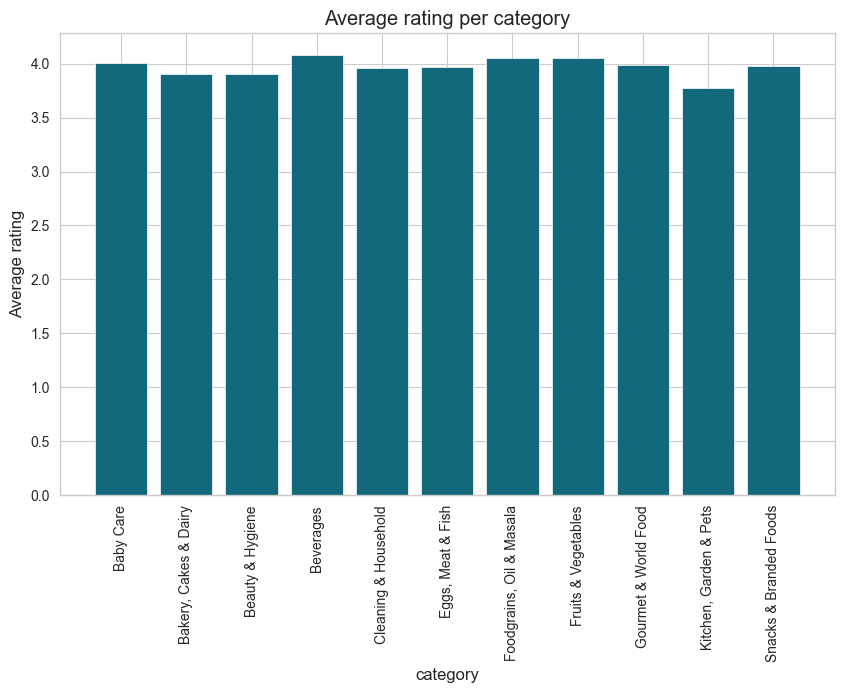

In [80]:
avg = df.groupby('category')['rating'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(avg['category'], avg['rating'], color='#13697C')
plt.xlabel('category')
plt.ylabel('Average rating')
plt.title('Average rating per category')
plt.xticks(rotation=90)
plt.show()

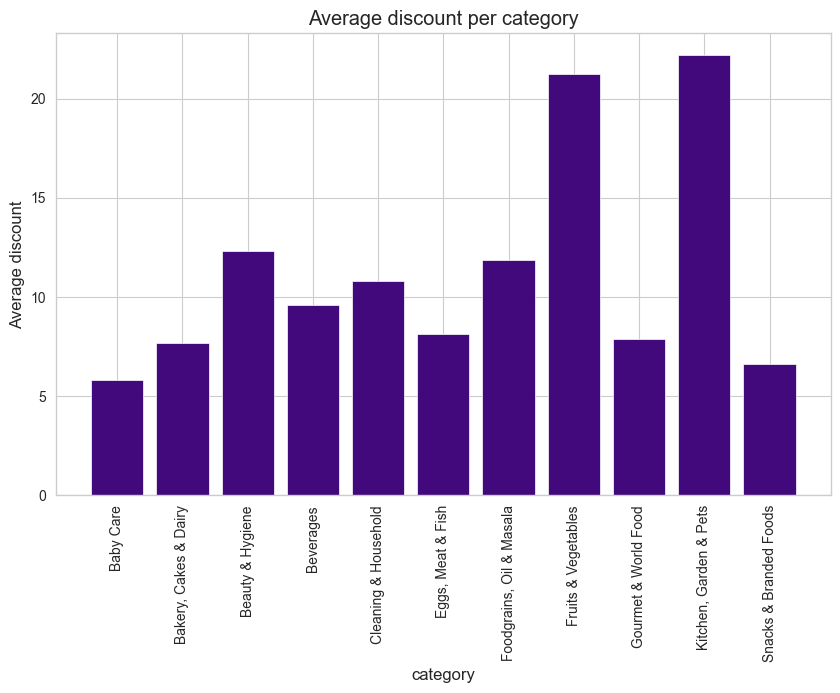

In [82]:
avg = df.groupby('category')['discount'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(avg['category'], avg['discount'], color='#41097C')
plt.xlabel('category')
plt.ylabel('Average discount')
plt.title('Average discount per category')
plt.xticks(rotation=90)
plt.show()

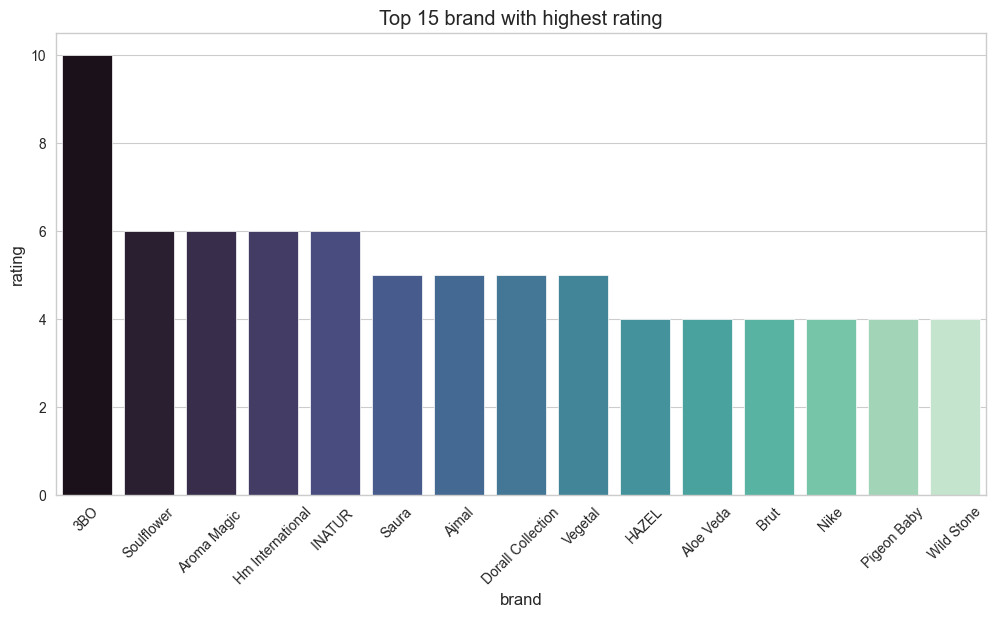

In [84]:
count = df[df['rating'] == 1]['brand'].value_counts().head(15)
plt.figure(figsize=(12, 6))
sns.barplot(x=count.index, y=count.values, palette='mako')
plt.title('Top 15 brand with highest rating')
plt.xlabel('brand')
plt.ylabel('rating')
plt.xticks(rotation=45)
plt.show()

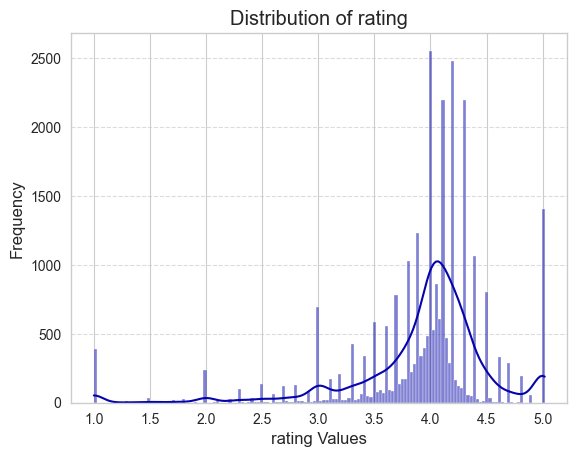

In [86]:
sns.histplot(df['rating'], kde=True, color='#0504aa', bins='auto')
plt.title('Distribution of rating')
plt.xlabel('rating Values')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

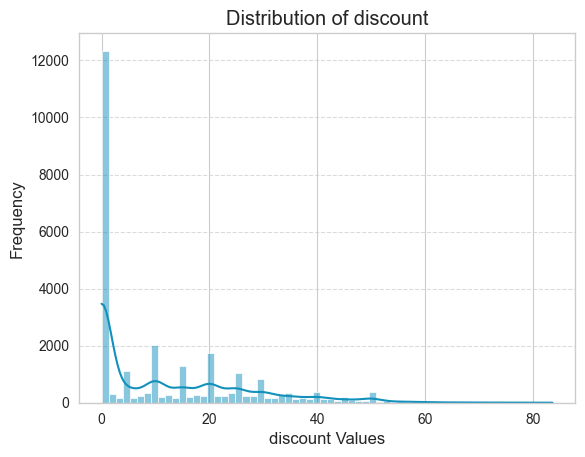

In [89]:
sns.histplot(df['discount'], kde=True, color='#1390bc', bins='auto')
plt.title('Distribution of discount')
plt.xlabel('discount Values')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [85]:
top_brands = df[df['rating'] == 1]['brand'].value_counts().head(15).index
filtered_df = df[df['brand'].isin(top_brands)]
unique_categories = filtered_df['category'].unique()
print(unique_categories)


['Beauty & Hygiene' 'Kitchen, Garden & Pets' 'Baby Care'
 'Cleaning & Household']


In [60]:
one_hot_encoded = pd.get_dummies(df['category'], prefix='category')

In [62]:
one_hot_encoded = one_hot_encoded.astype(int)

In [63]:
one_hot_encoded.head()

,category_Baby Care,"category_Bakery, Cakes & Dairy",category_Beauty & Hygiene,category_Beverages,category_Cleaning & Household,"category_Eggs, Meat & Fish","category_Foodgrains, Oil & Masala",category_Fruits & Vegetables,category_Gourmet & World Food,"category_Kitchen, Garden & Pets",category_Snacks & Branded Foods
0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [64]:
df = pd.concat([df, one_hot_encoded], axis=1)

In [65]:
df = df.drop(columns=['type', 'sub_category', 'brand', 'sale_price', 'market_price'])

In [67]:
df = df.drop(columns=['category'])

In [68]:
df.head()

,product,rating,description,discount,category_Baby Care,"category_Bakery, Cakes & Dairy",category_Beauty & Hygiene,category_Beverages,category_Cleaning & Household,"category_Eggs, Meat & Fish","category_Foodgrains, Oil & Masala",category_Fruits & Vegetables,category_Gourmet & World Food,"category_Kitchen, Garden & Pets",category_Snacks & Branded Foods
0,Garlic Oil - Vegetarian Capsule 500 mg,4.1,This Product contains Garlic Oil that is known...,0.000000,0,0,1,0,0,0,0,0,0,0,0
1,Water Bottle - Orange,2.3,"Each product is microwave safe (without lid), ...",0.000000,0,0,0,0,0,0,0,0,0,1,0
2,"Brass Angle Deep - Plain, No.2",3.4,"A perfect gift for all occasions, be it your m...",52.400000,0,0,0,0,1,0,0,0,0,0,0
3,Cereal Flip Lid Container/Storage Jar - Assort...,3.7,Multipurpose container with an attractive desi...,15.340909,0,0,0,0,1,0,0,0,0,0,0
4,Creme Soft Soap - For Hands & Body,4.4,Nivea Creme Soft Soap gives your skin the best...,0.000000,0,0,1,0,0,0,0,0,0,0,0


In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['discount', 'rating']] = scaler.fit_transform(df[['discount', 'rating']])

In [ ]:
df.head()

,product,rating,description,discount,category_Baby Care,"category_Bakery, Cakes & Dairy",category_Beauty & Hygiene,category_Beverages,category_Cleaning & Household,"category_Eggs, Meat & Fish","category_Foodgrains, Oil & Masala",category_Fruits & Vegetables,category_Gourmet & World Food,"category_Kitchen, Garden & Pets",category_Snacks & Branded Foods
0,Garlic Oil - Vegetarian Capsule 500 mg,4.1,This Product contains Garlic Oil that is known...,0.000000,0,0,1,0,0,0,0,0,0,0,0
1,Water Bottle - Orange,2.3,"Each product is microwave safe (without lid), ...",0.000000,0,0,0,0,0,0,0,0,0,1,0
2,"Brass Angle Deep - Plain, No.2",3.4,"A perfect gift for all occasions, be it your m...",52.400000,0,0,0,0,1,0,0,0,0,0,0
3,Cereal Flip Lid Container/Storage Jar - Assort...,3.7,Multipurpose container with an attractive desi...,15.340909,0,0,0,0,1,0,0,0,0,0,0
4,Creme Soft Soap - For Hands & Body,4.4,Nivea Creme Soft Soap gives your skin the best...,0.000000,0,0,1,0,0,0,0,0,0,0,0


In [30]:
df.shape

(27439, 20)

In [8]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['description'])
tfidf_matrix.shape

(27439, 28666)

In [18]:
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

In [70]:
df_sub = df.drop(columns=['product', 'description'])
df_combined = pd.concat([tfidf_df, df_sub], axis=1)

In [71]:
from sklearn.metrics.pairwise import cosine_similarity
cosine = cosine_similarity(df_combined)
mapping = pd.Series(df.index, index=df['product'])

In [73]:
def recommend_product_based_on_click(product_input):
    product_index = mapping[product_input]
    similarity_score = list(enumerate(cosine[product_index]))
    similarity_score = sorted(similarity_score, key=lambda x: x[1], reverse=True)
    similarity_score = similarity_score[1:10]
    product_indices = [i[0] for i in similarity_score]
    return df['product'].iloc[product_indices]

In [74]:
recommend_product_based_on_click('Onion Herbal Hair Growth Oil')

20924                                         Bringha Oil
25142               Non-Sticky Hair Oil - Walnut & Almond
20598                         Naturals Bhringraj Hair Oil
18860            Hair Oil - For Strong, Long & Thick Hair
17828                             Hair Oil - Almond Drops
3779                     Cold Pressed Avocado Carrier Oil
9803                                    Regrowth Hair Oil
26721      Hair Fruits Shining Black Conditioning Shampoo
20645    Vatika - Enriched Coconut with Hibiscus Hair Oil
Name: product, dtype: object